# Import libraries

In [1]:
from matplotlib import pyplot
from scipy import stats
import csv
import cv2
import fnmatch
import math
import numpy as np
import os

# Set parameters

In [2]:
CAMERA_COUNT = 3

DRIVING_LOG_PATH = './data'
DRIVING_LOG_FILE = 'driving_log.csv'

CENTER_IMAGE_REGULAR_EXPRESSION = 'center*'
IMAGE_PATH = './data/IMG'

SET_SIZE = 8036

center_camera_file = 'center_2016_12_01_13_37_16_570.jpg'
left_camera_file = 'left_2016_12_01_13_37_16_570.jpg'
right_camera_file = 'right_2016_12_01_13_37_16_570.jpg'

hard_left_file = 'center_2016_12_01_13_39_28_024.jpg'
hard_right_file = 'center_2016_12_01_13_38_46_752.jpg'

# Get data

Use data by Udacity.

Source: https://d17h27t6h515a5.cloudfront.net/topher/2016/December/584f6edd_data/data.zip

Size: 322.8 MB

In [3]:
# Resize image to 16 rows by 32 columns

In [4]:
# Get features and labels that correspond to hard left turn, straight, and hard right turn
# Tune model to predict these 3 steering angles correctly
# left = np.array(cv2.imread(
#     os.path.join(
#         IMAGE_PATH,
#         hard_left_file
#     )
# ), dtype = 'float32')
# center = np.array(cv2.imread(
#     os.path.join(
#         IMAGE_PATH,
#         center_camera_file
#     )
# ), dtype = 'float32')
# right = np.array(cv2.imread(
#     os.path.join(
#         IMAGE_PATH,
#         hard_right_file
#     )
# ), dtype = 'float32')
# features = np.stack((left, center, right))

# labels = np.array([-0.9426954, 0, 1], dtype = 'float32')

In [5]:
file = open(os.path.join(DRIVING_LOG_PATH, DRIVING_LOG_FILE), 'r')
reader = csv.reader(file)

reader.__next__()

labels = np.array(
    [
        reader.__next__()[3]
        for index in range(SET_SIZE)
    ],
    dtype = 'float32'
)

# Explore data

In [6]:
file = open(os.path.join(DRIVING_LOG_PATH, DRIVING_LOG_FILE), 'r')
reader = csv.reader(file)

print(reader.__next__())
print(reader.__next__())

['center', 'left', 'right', 'steering', 'throttle', 'brake', 'speed']
['IMG/center_2016_12_01_13_30_48_287.jpg', ' IMG/left_2016_12_01_13_30_48_287.jpg', ' IMG/right_2016_12_01_13_30_48_287.jpg', ' 0', ' 0', ' 0', ' 22.14829']


In [7]:
count = len(os.listdir(IMAGE_PATH))

print('Count:', count)
print('Frames:', count / CAMERA_COUNT)

Count: 24108
Frames: 8036.0


In [8]:
data = np.array([1 for file in os.listdir(IMAGE_PATH) if fnmatch.fnmatch(file, CENTER_IMAGE_REGULAR_EXPRESSION)], dtype = 'float32')
print('Center image count:', data.sum())

Center image count: 8036.0


Shape: (160, 320, 3)


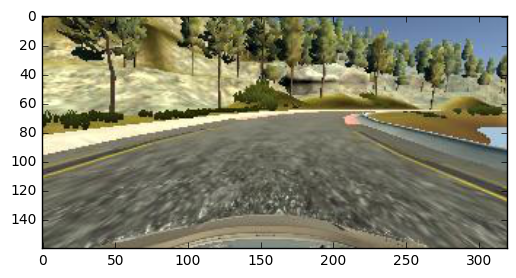

In [9]:
image_center = cv2.imread(os.path.join(IMAGE_PATH, center_camera_file))
print('Shape:', image_center.shape)
pyplot.imshow(cv2.cvtColor(image_center, cv2.COLOR_BGR2RGB))
pyplot.show()

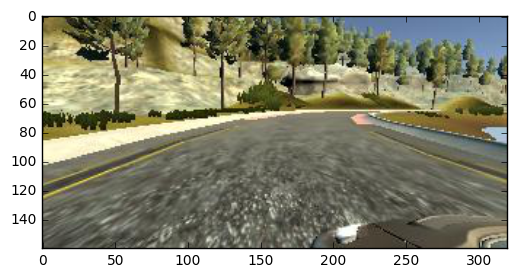

In [10]:
image_left = cv2.imread(os.path.join(IMAGE_PATH, left_camera_file))
pyplot.imshow(cv2.cvtColor(image_left, cv2.COLOR_BGR2RGB))
pyplot.show()

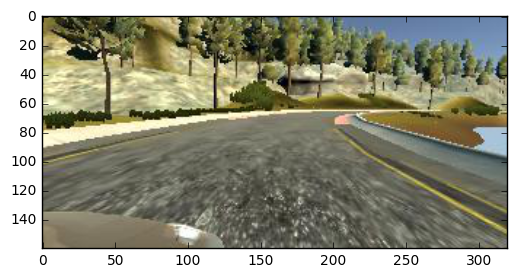

In [11]:
image_right = cv2.imread(os.path.join(IMAGE_PATH, right_camera_file))
pyplot.imshow(cv2.cvtColor(image_right, cv2.COLOR_BGR2RGB))
pyplot.show()

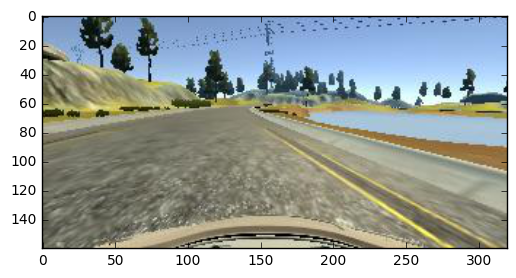

In [12]:
image_hard_left = cv2.imread(os.path.join(IMAGE_PATH, hard_left_file))
pyplot.imshow(cv2.cvtColor(image_hard_left, cv2.COLOR_BGR2RGB))
pyplot.show()

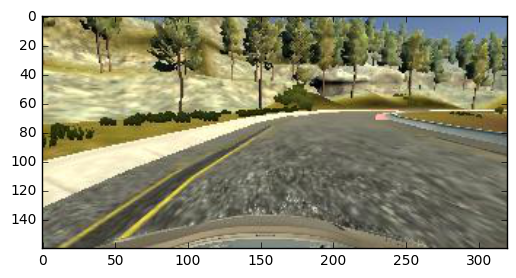

In [13]:
image_hard_right = cv2.imread(os.path.join(IMAGE_PATH, hard_right_file))
pyplot.imshow(cv2.cvtColor(image_hard_right, cv2.COLOR_BGR2RGB))
pyplot.show()

In [14]:
stats.describe(labels)

DescribeResult(nobs=8036, minmax=(-0.94269538, 1.0), mean=0.0040696422, variance=0.016599763, skewness=-0.13028928637504578, kurtosis=6.311554415049061)

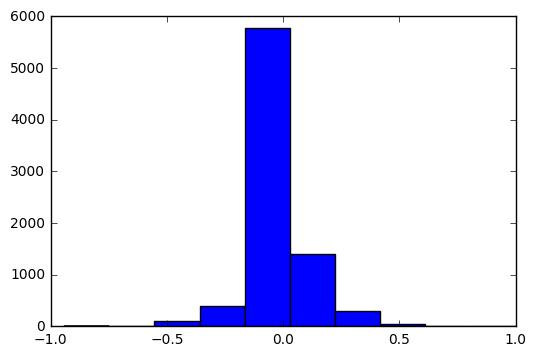

In [15]:
pyplot.hist(labels)
pyplot.show()


# Transform data

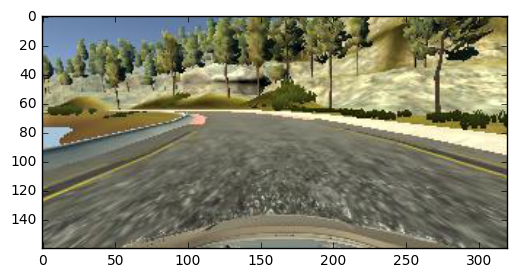

In [16]:
image_center_flipped = cv2.flip(image_center, 1)
pyplot.imshow(cv2.cvtColor(image_center_flipped, cv2.COLOR_BGR2RGB))
pyplot.show()

Shape: (16, 32, 3)


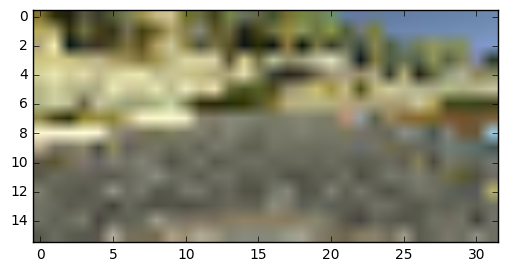

In [17]:
image_center_resized = cv2.resize(image_center, (32, 16))
print('Shape:', image_center_resized.shape)
pyplot.imshow(cv2.cvtColor(image_center_resized, cv2.COLOR_BGR2RGB))
pyplot.show()

Shape: (66, 320, 3)


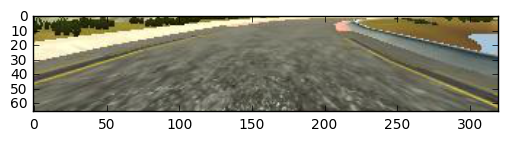

In [18]:
y_start = 64
y_end = image_center.shape[0] - 30
x_start = 0
x_end = image_center.shape[1]

image_center_cropped = image_center[y_start:y_end, x_start:x_end]
print('Shape:', image_center_cropped.shape)

pyplot.imshow(cv2.cvtColor(image_center_cropped, cv2.COLOR_BGR2RGB))
pyplot.show()

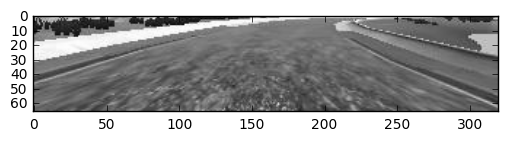

In [19]:
image_center_cropped_grayscale = cv2.cvtColor(image_center_cropped, cv2.COLOR_BGR2GRAY)
pyplot.imshow(image_center_cropped_grayscale, cmap = 'gray')
pyplot.show()

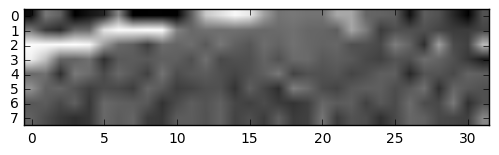

In [20]:
image_center_cropped_grayscale_resized = cv2.resize(image_center_cropped_grayscale, (32, 8))
pyplot.imshow(image_center_cropped_grayscale_resized, cmap = 'gray')
pyplot.show()